# Effect of the Sample Size on the Estimation Error

This notebook contains the results of the analysis on sample size effect on estimation error (§6.3 in the paper).

*Note: We only perform this ablation study only for the SimpleCombined and Friedman1 groundtruth functions, since these are the only ones for which we can derive the feature effects analytically.*

In [1]:
from joblib import load
from pathlib import Path
from configparser import ConfigParser
import matplotlib.pyplot as plt
import numpy as np

from current_research_feature_effects.plotting.plots import (
    plot_mean_estimation_error,
    plot_mcvariance_over_features,
)

In [2]:
EXPERIMENT_PATH = Path("../experiments/ablation_study_mc_error")
config = ConfigParser()
config.read(EXPERIMENT_PATH / "ablation_study_mc.ini")
n_samples = np.logspace(
    int(config.get("study_params", "n_samples").split(",")[0]),
    int(config.get("study_params", "n_samples").split(",")[1]),
    num=int(config.get("study_params", "n_samples").split(",")[2]),
)

## Simple Normal Correlated

In [3]:
simple_experiment = "SimpleNormalCorrelated"
simplecomb_groundtruth = load(EXPERIMENT_PATH / simple_experiment / "groundtruth.joblib")
results_simplecomb = load(EXPERIMENT_PATH / simple_experiment / "ablation_results.joblib")

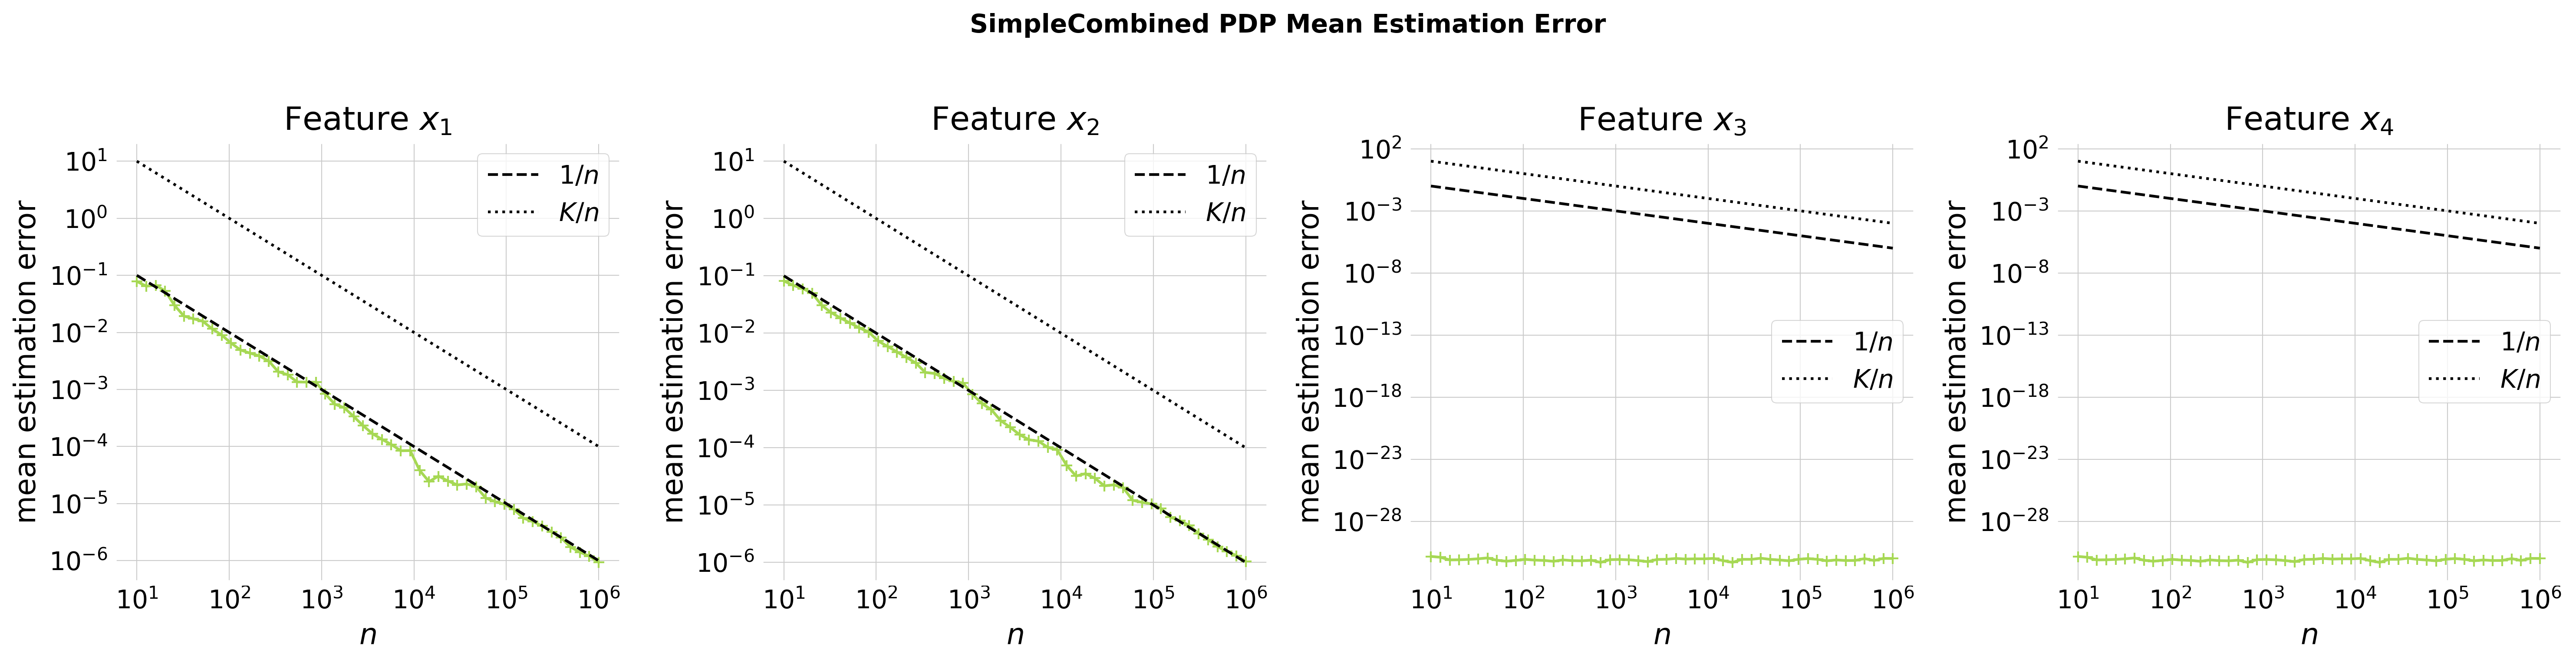

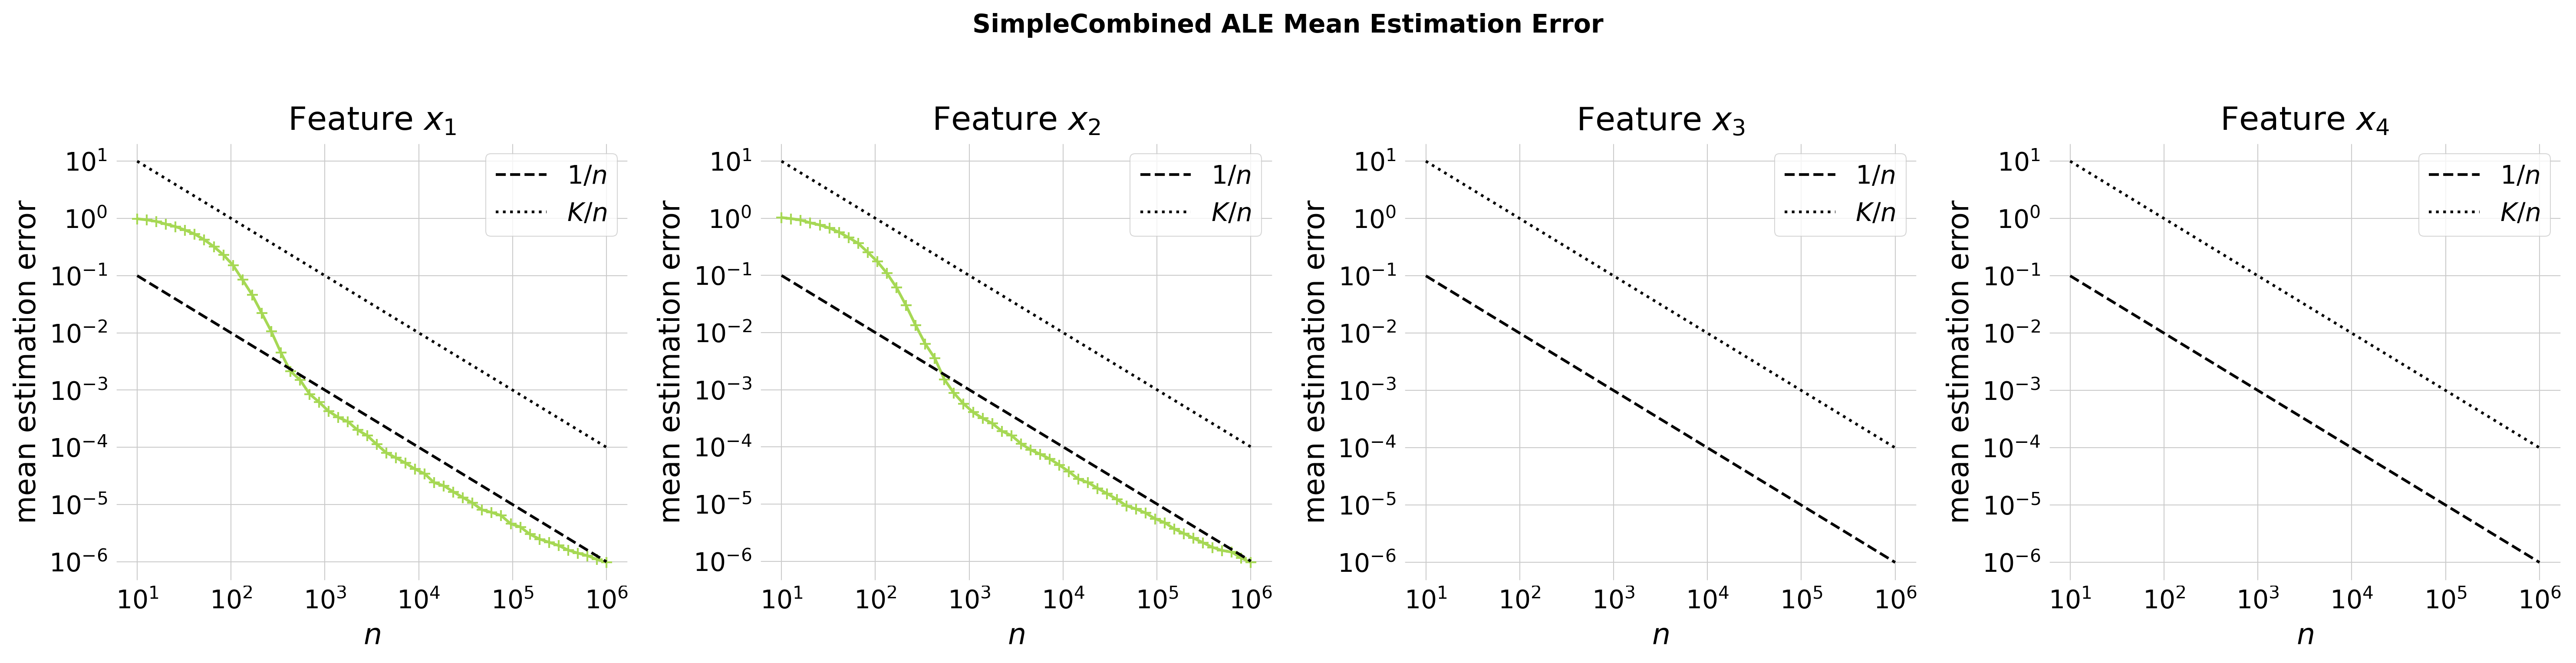

In [4]:
plot_mean_estimation_error(
    results_simplecomb["pdp"],
    simplecomb_groundtruth.feature_names,
    title="SimpleCombined PDP Mean Estimation Error",
    xscale="log",
    plot_rate=True,
    large_font=True,
)
plot_mean_estimation_error(
    results_simplecomb["ale"],
    simplecomb_groundtruth.feature_names,
    title="SimpleCombined ALE Mean Estimation Error",
    xscale="log",
    plot_rate=True,
    large_font=True,
)
plt.show()

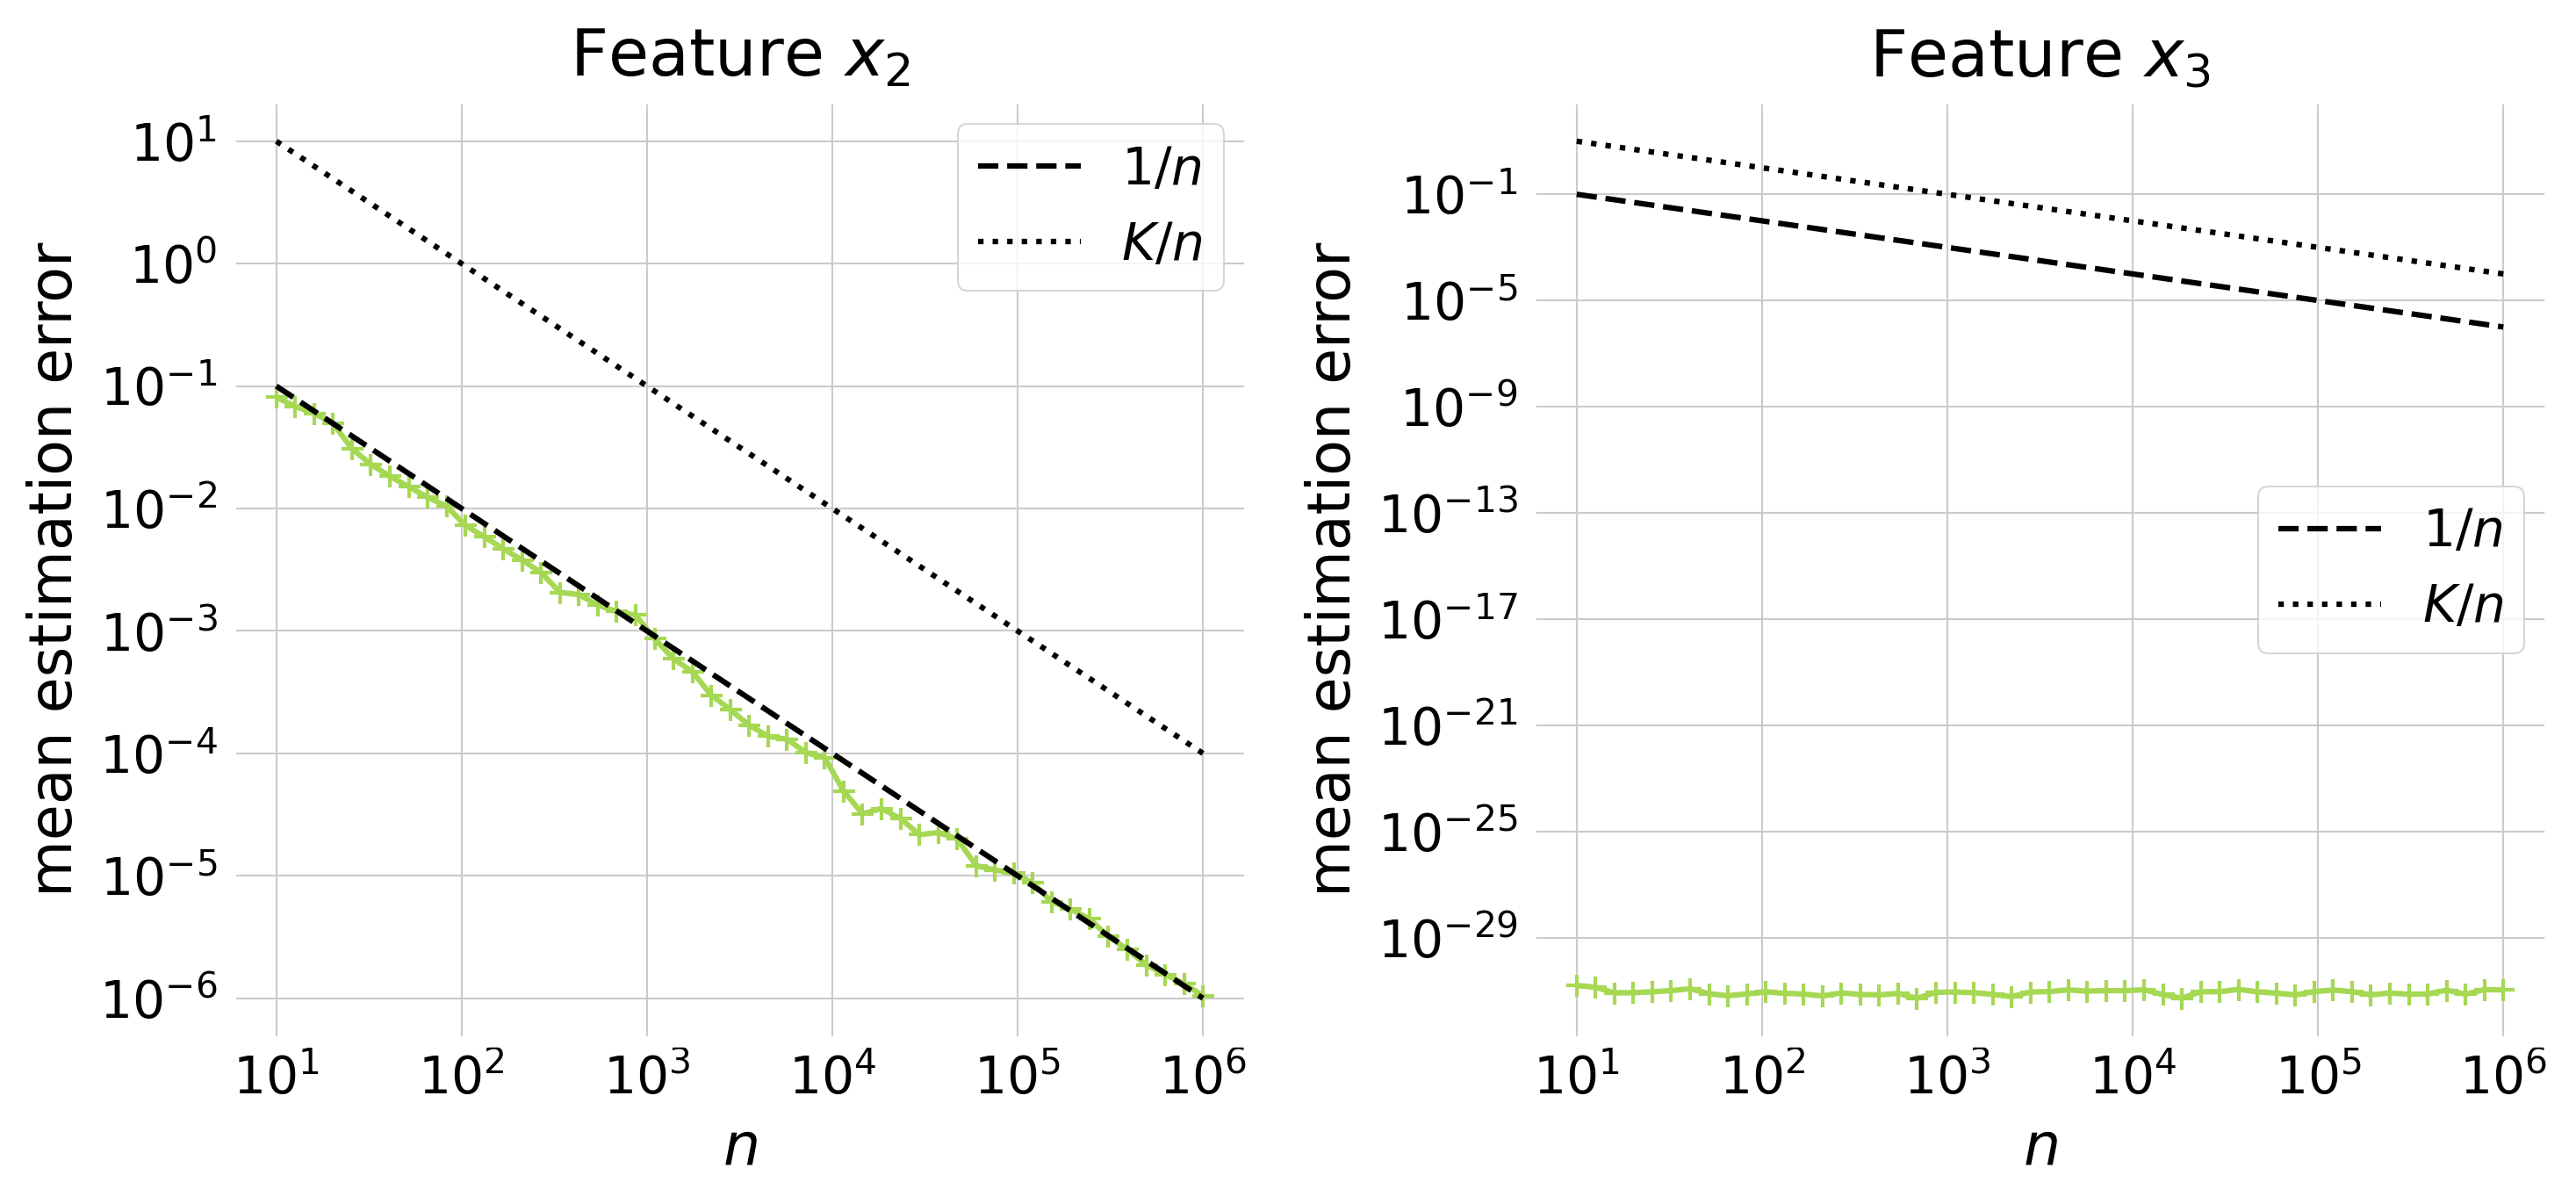

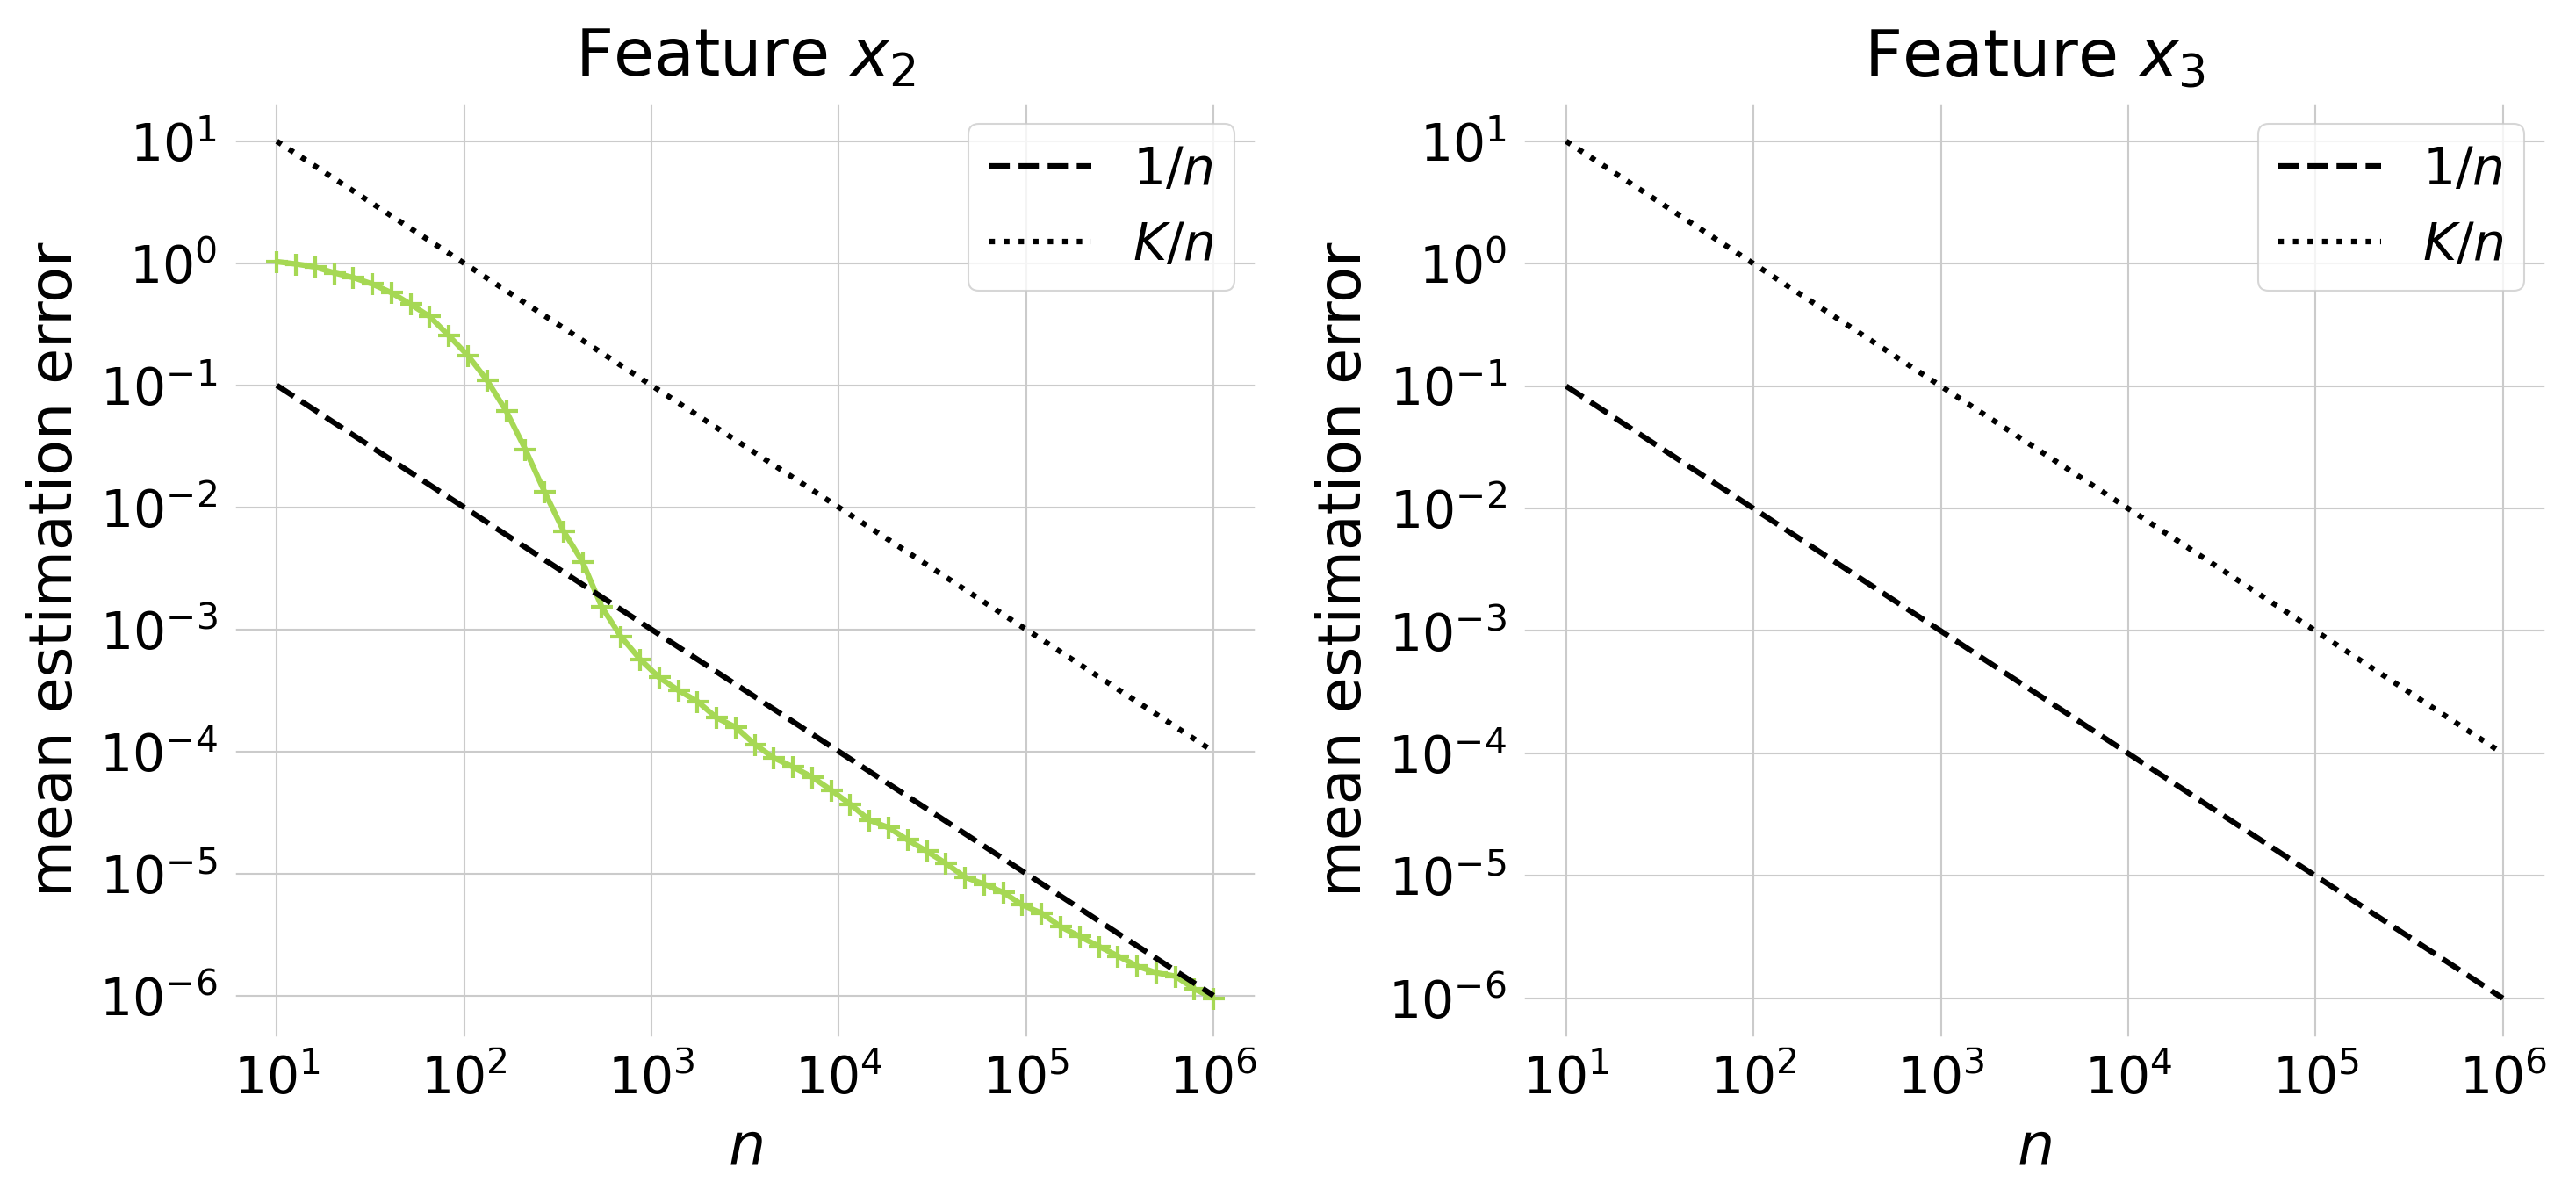

In [5]:
# ---- for paper ----
plot_mean_estimation_error(
    results_simplecomb["pdp"],
    ["x_2", "x_3"],
    xscale="log",
    plot_rate=True,
    large_font=True,
    save_figs=Path("img/mean_estimation_error_snc_pdp.pdf"),
)
plot_mean_estimation_error(
    results_simplecomb["ale"],
    ["x_2", "x_3"],
    xscale="log",
    plot_rate=True,
    large_font=True,
    save_figs=Path("img/mean_estimation_error_snc_ale.pdf"),
)
plt.show()

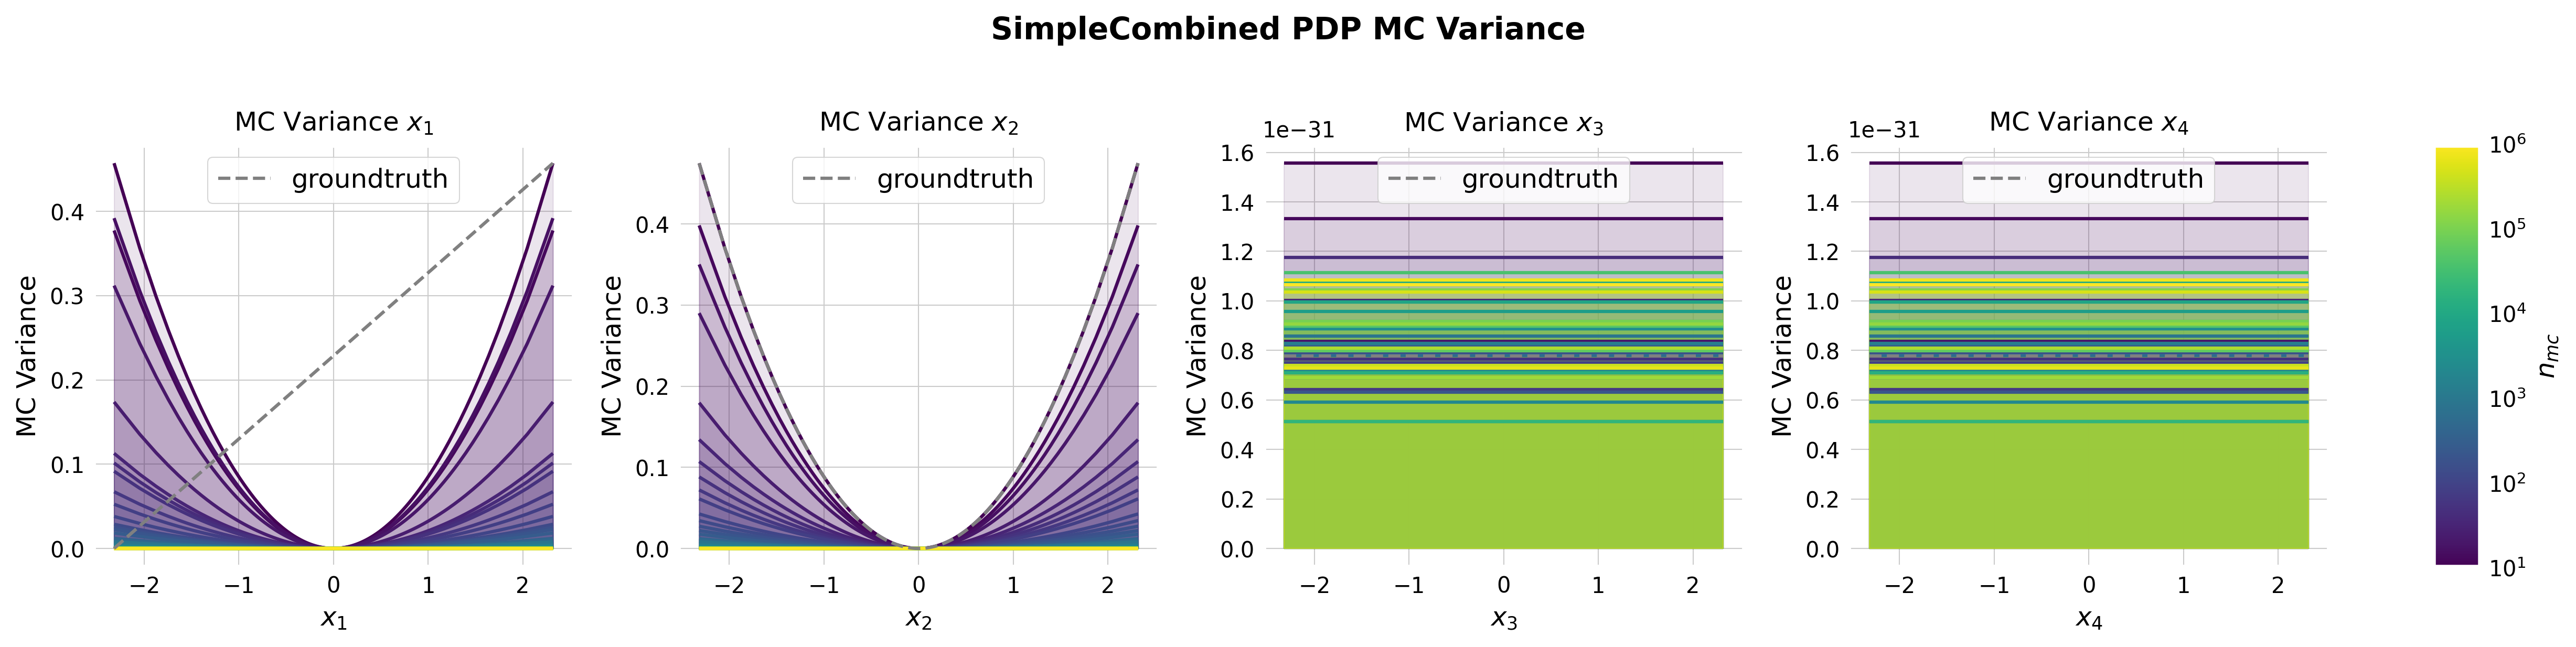

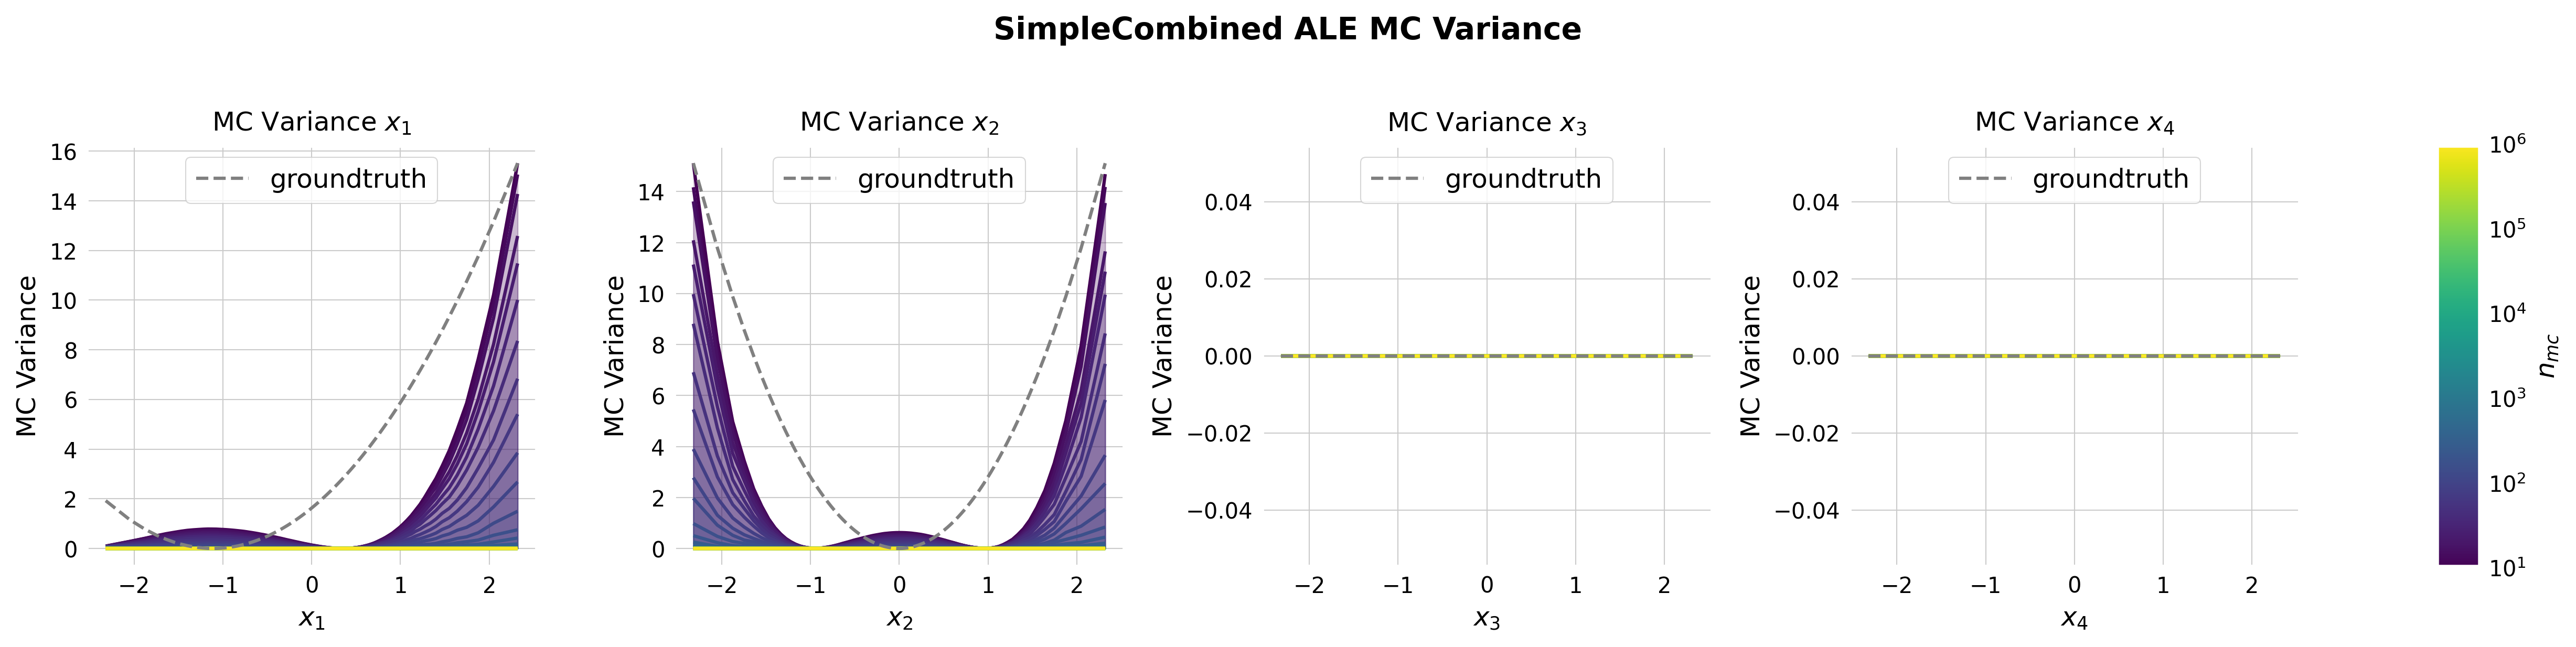

In [6]:
plot_mcvariance_over_features(
    results_simplecomb["pdp"],
    simplecomb_groundtruth.feature_names,
    title=f"SimpleCombined PDP MC Variance",
    groundtruth=simplecomb_groundtruth,
    # large_font=True,
    # save_figs=Path("../paper/img/SNC-all/"),
)
plot_mcvariance_over_features(
    results_simplecomb["ale"],
    simplecomb_groundtruth.feature_names,
    title=f"SimpleCombined ALE MC Variance",
    groundtruth=simplecomb_groundtruth,
    # large_font=True,
    # save_figs=Path("../paper/img/SNC-all/"),
)
plt.show()

## Friedman1

In [7]:
friedman1_experiment = "Friedman1"
friedman1_groundtruth = load(EXPERIMENT_PATH / friedman1_experiment / "groundtruth.joblib")
results_friedman1 = load(EXPERIMENT_PATH / friedman1_experiment / "ablation_results.joblib")

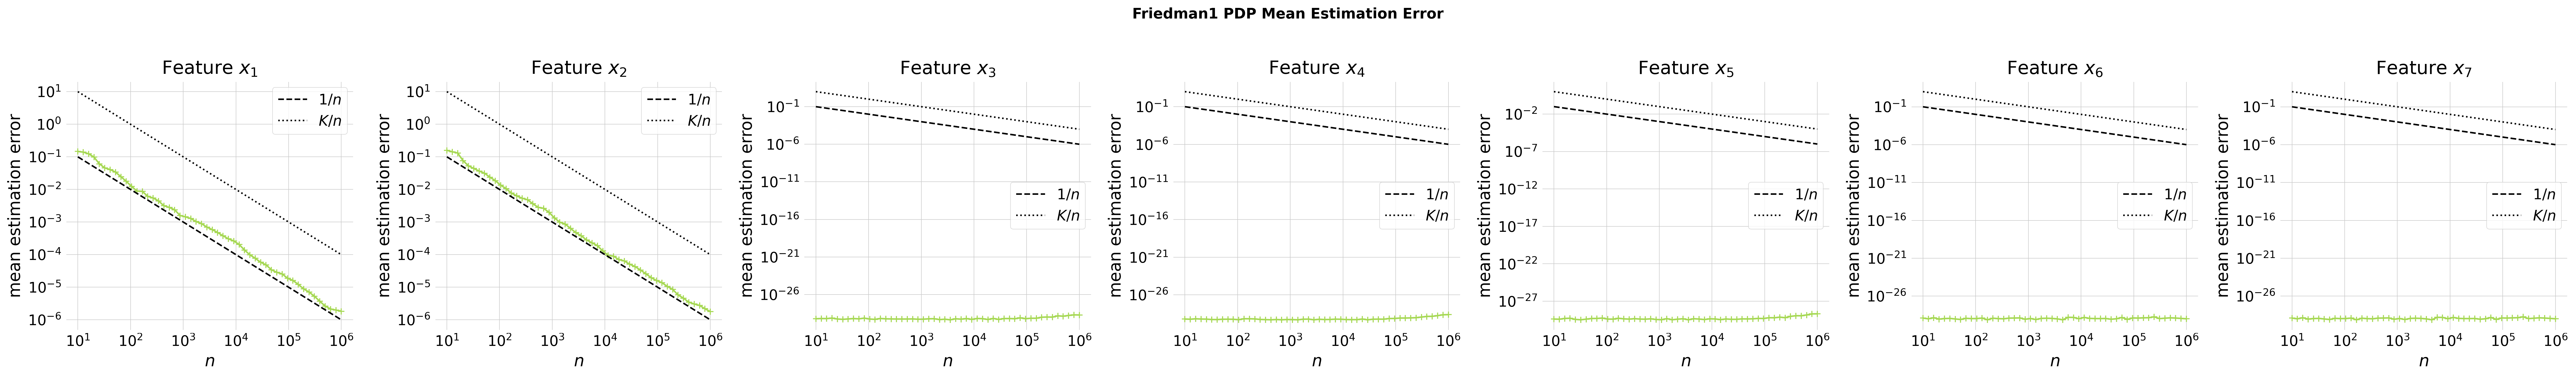

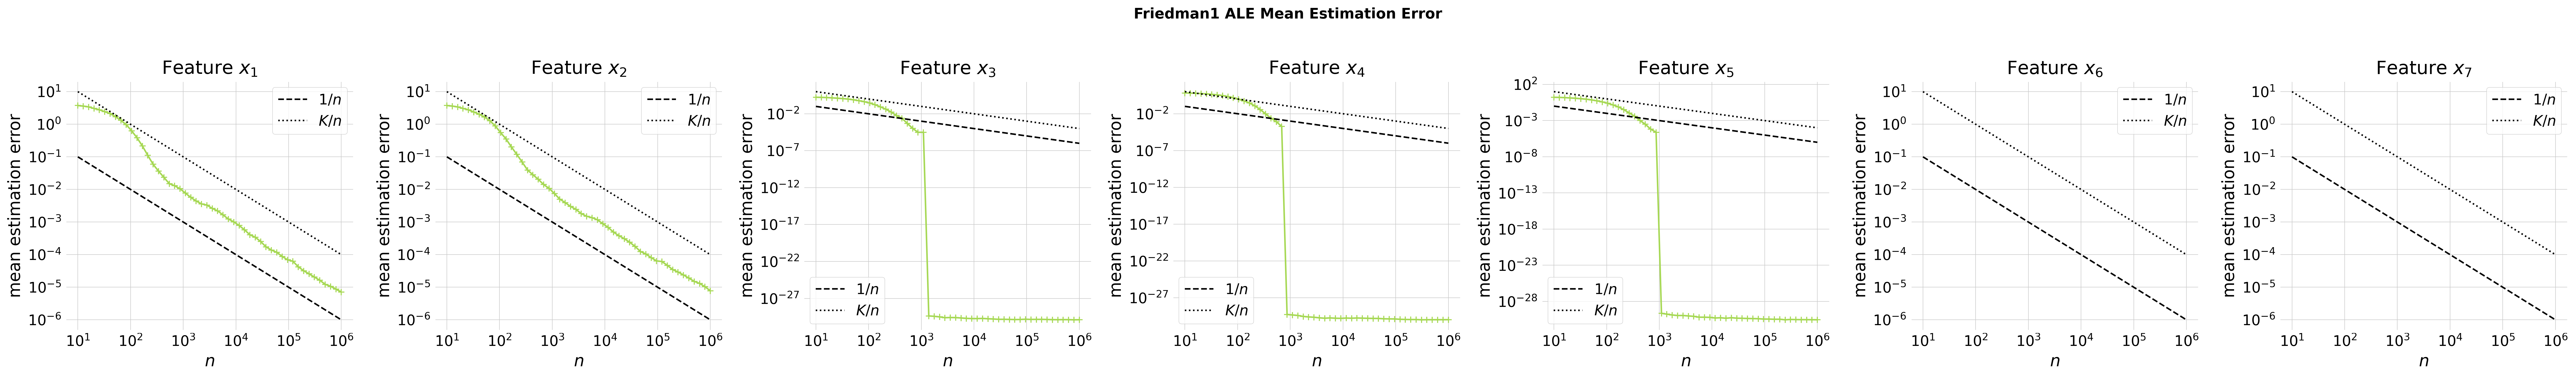

In [8]:
plot_mean_estimation_error(
    results_friedman1["pdp"],
    friedman1_groundtruth.feature_names,
    title="Friedman1 PDP Mean Estimation Error",
    xscale="log",
    plot_rate=True,
    large_font=True,
)
plot_mean_estimation_error(
    results_friedman1["ale"],
    friedman1_groundtruth.feature_names,
    title="Friedman1 ALE Mean Estimation Error",
    xscale="log",
    plot_rate=True,
    large_font=True,
)
plt.show()

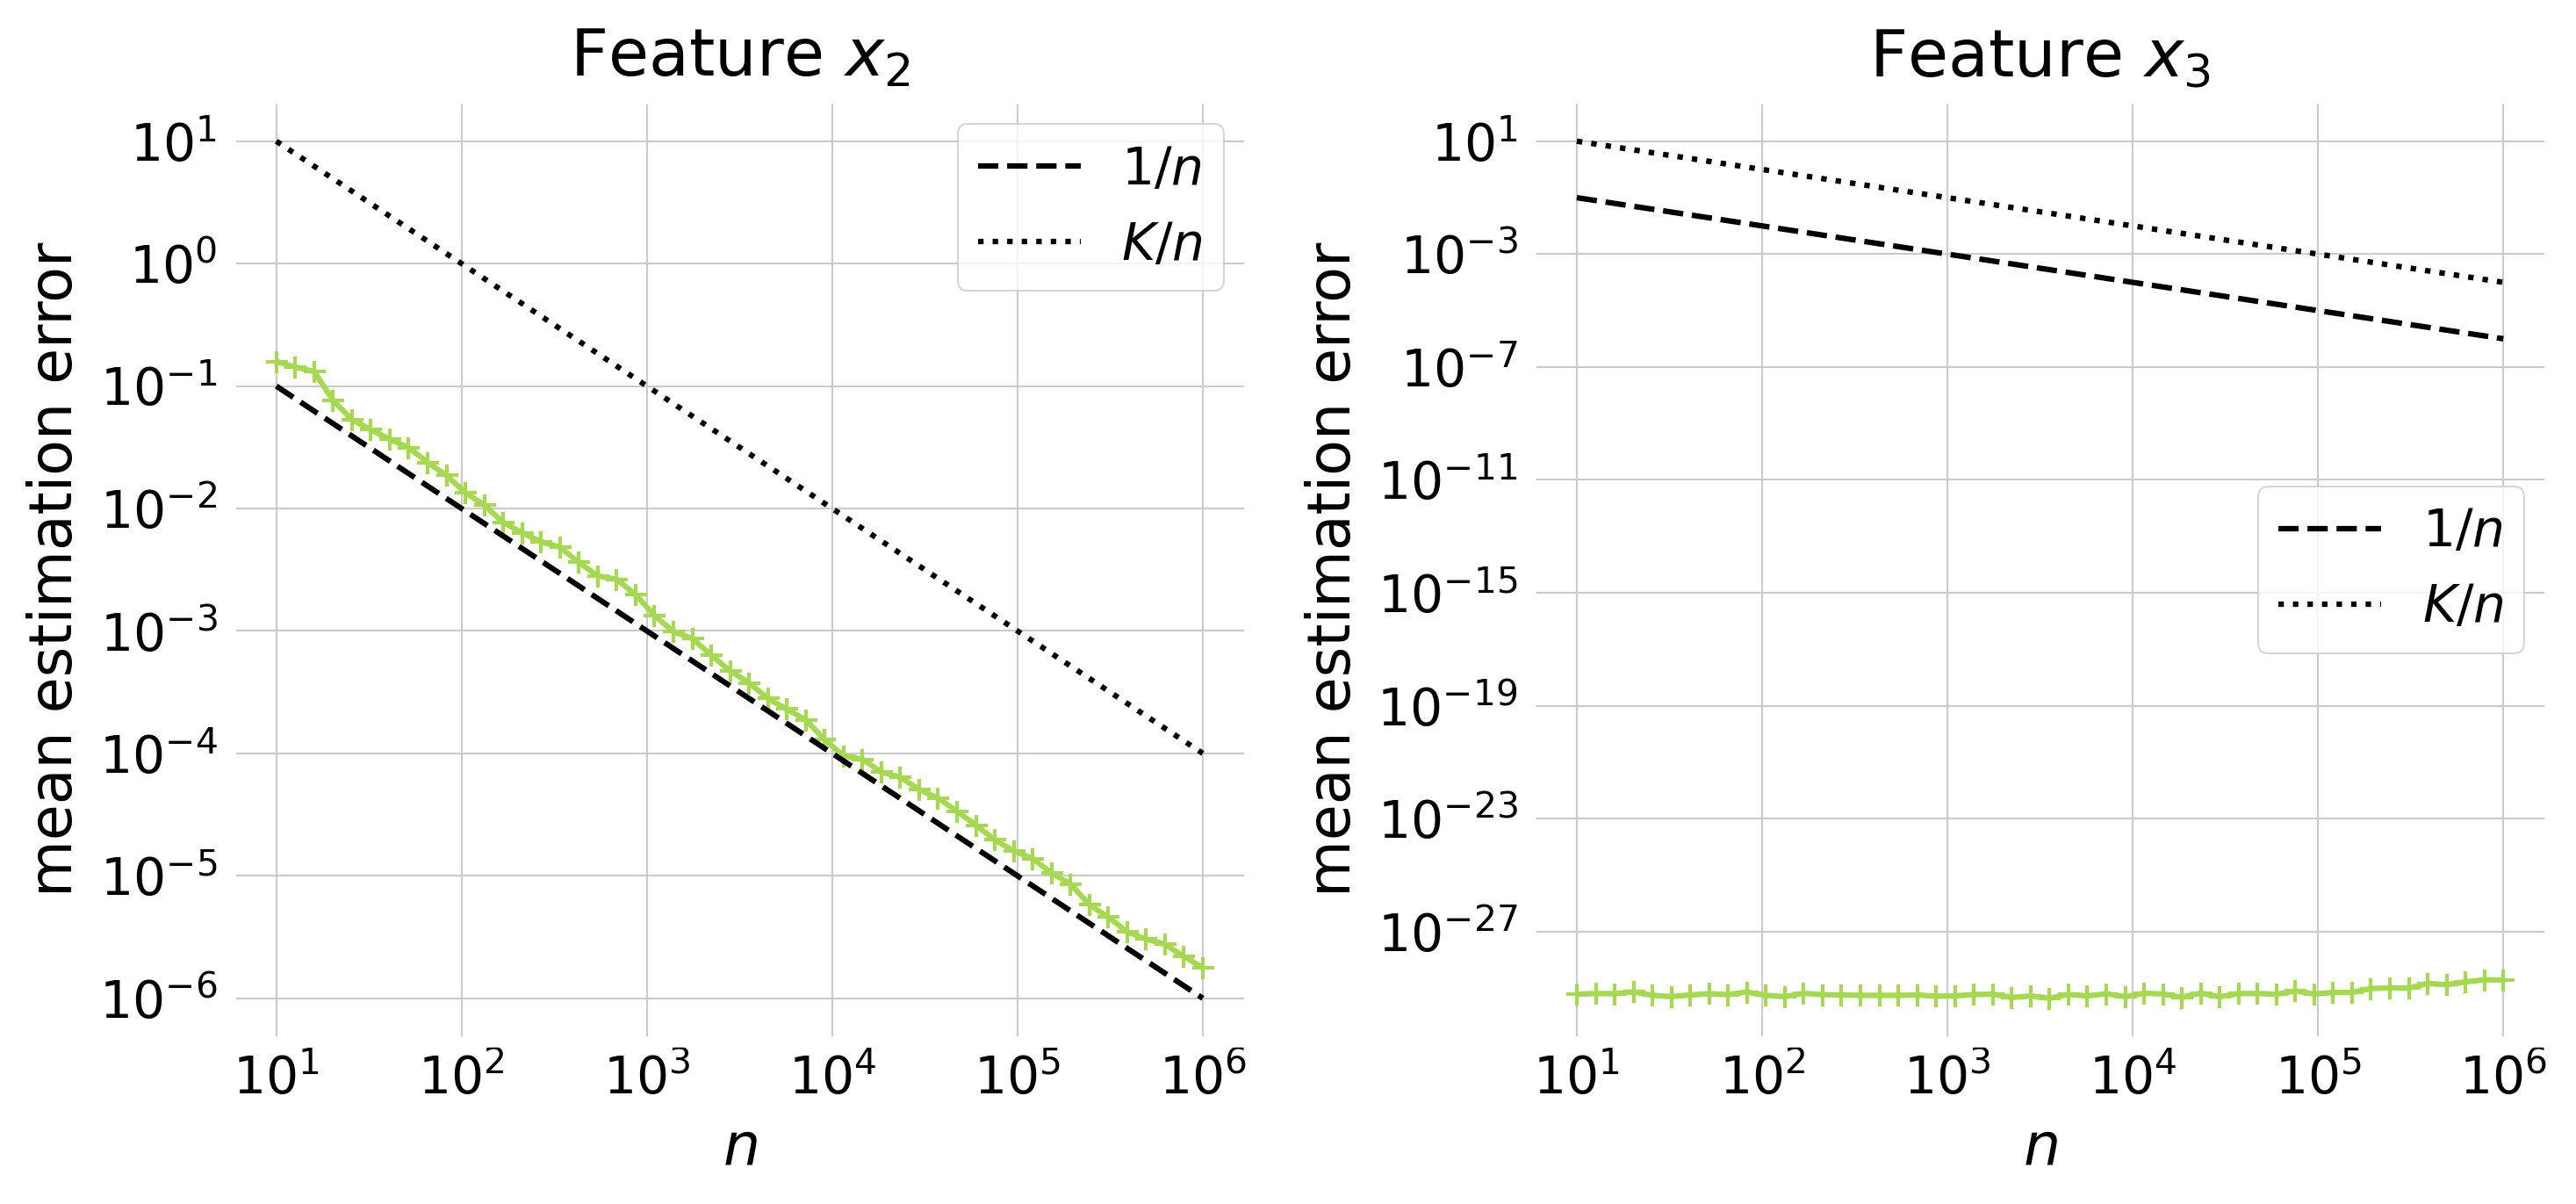

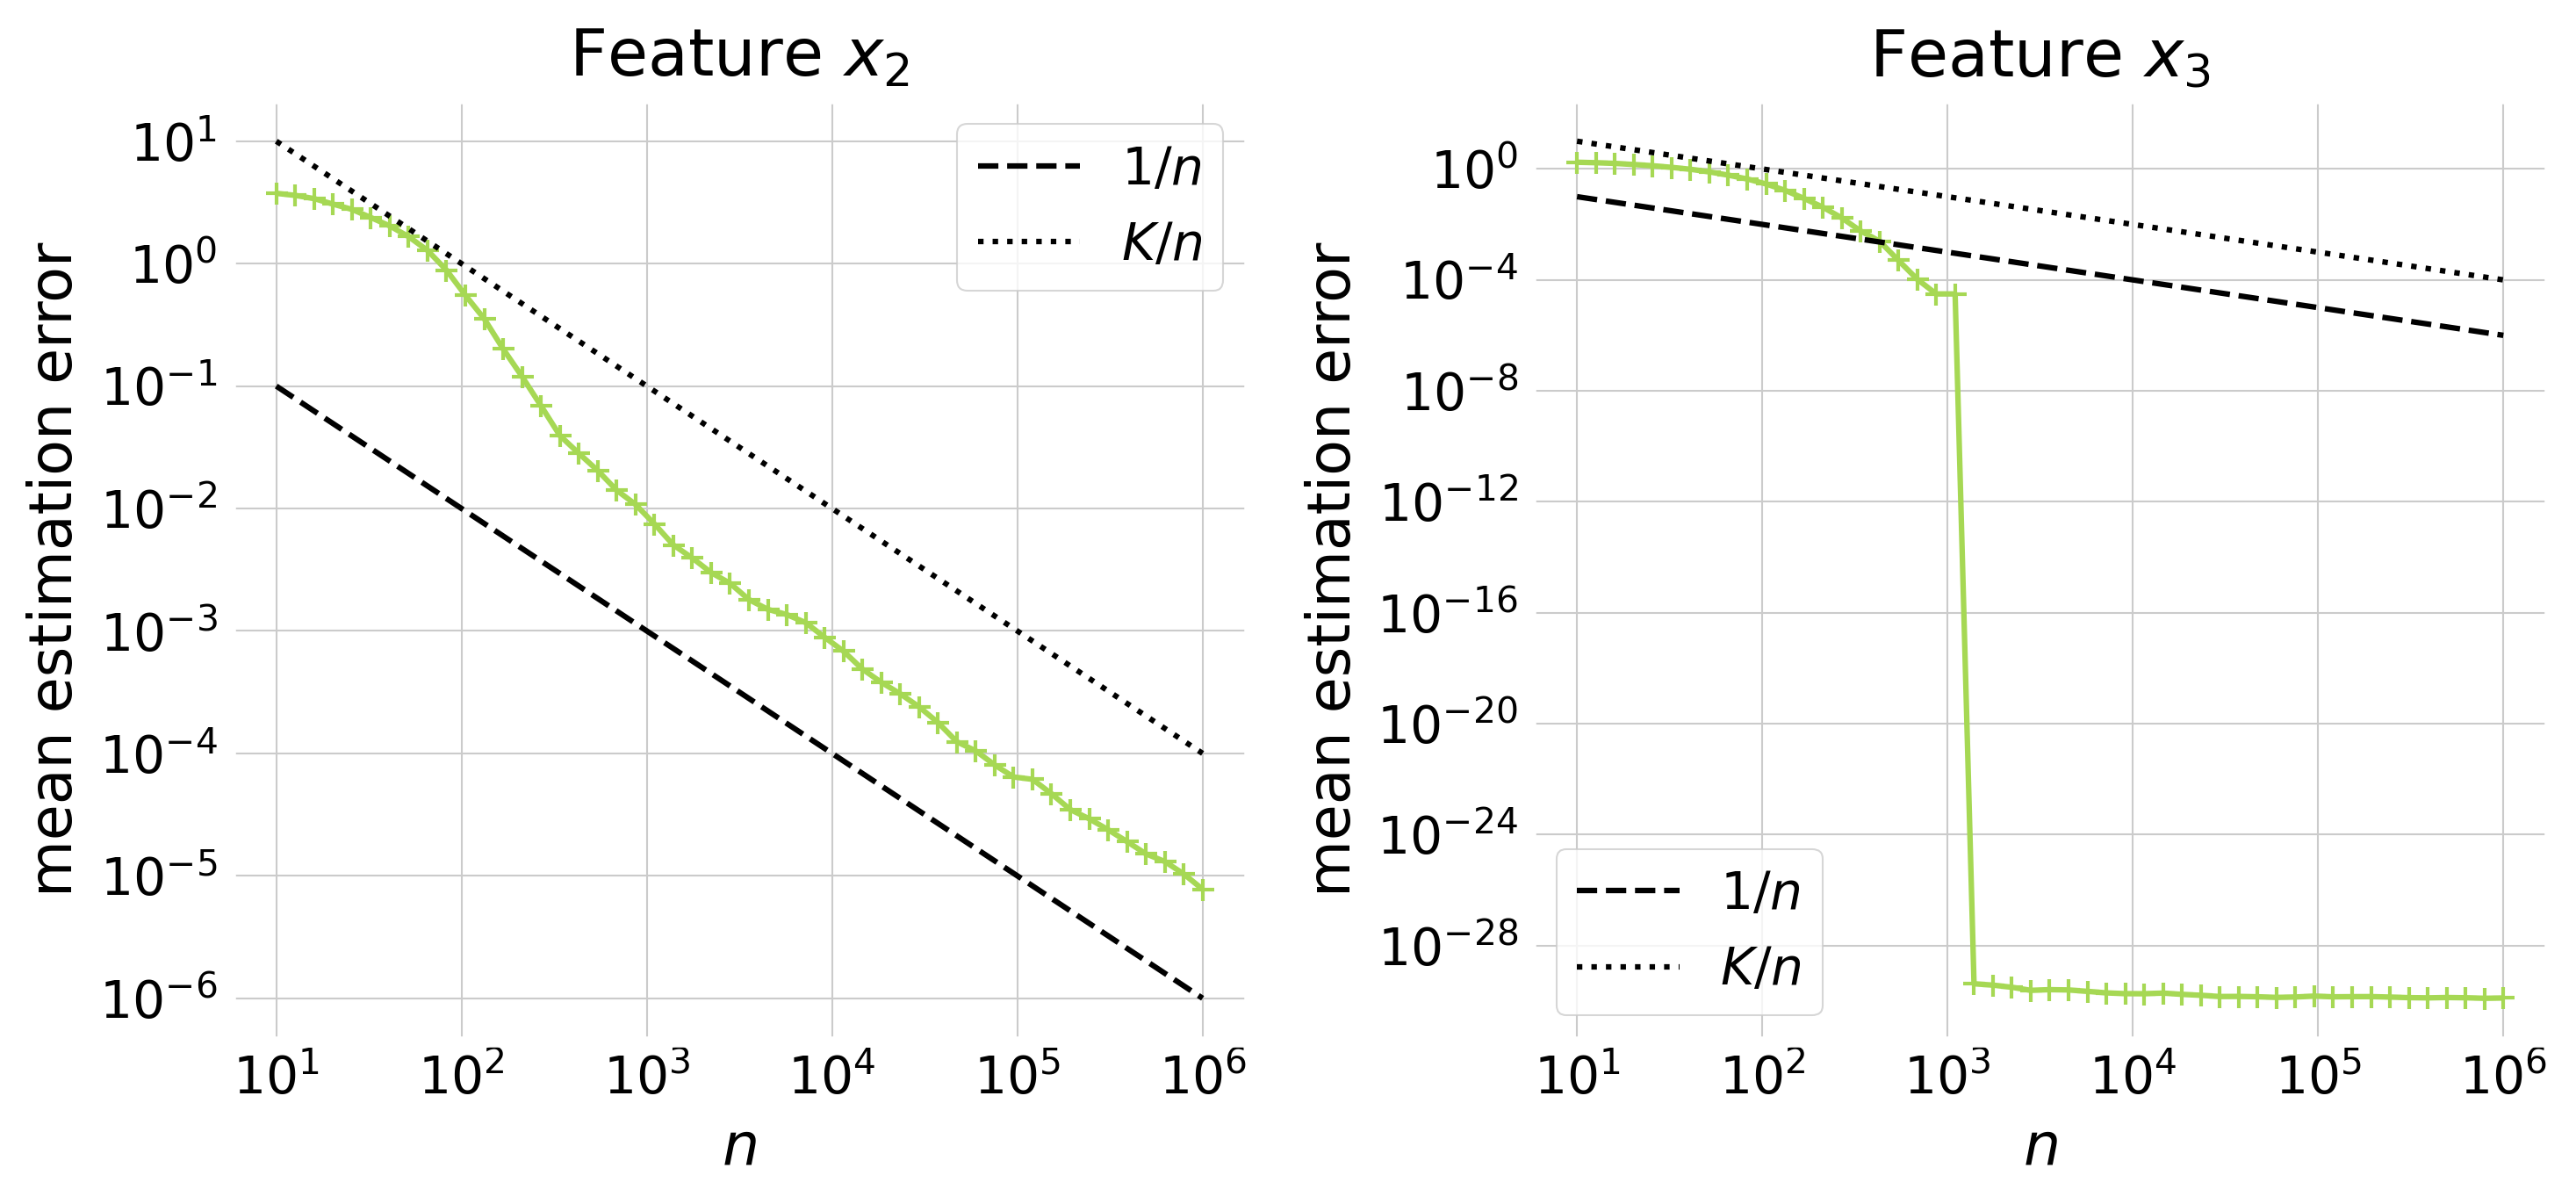

In [9]:
# ---- for paper ----
plot_mean_estimation_error(
    results_friedman1["pdp"],
    ["x_2", "x_3"],
    xscale="log",
    plot_rate=True,
    large_font=True,
    save_figs=Path("img/mean_estimation_error_f1_pdp.pdf"),
)
plot_mean_estimation_error(
    results_friedman1["ale"],
    ["x_2", "x_3"],
    xscale="log",
    plot_rate=True,
    large_font=True,
    save_figs=Path("img/mean_estimation_error_f1_ale.pdf"),
)
plt.show()

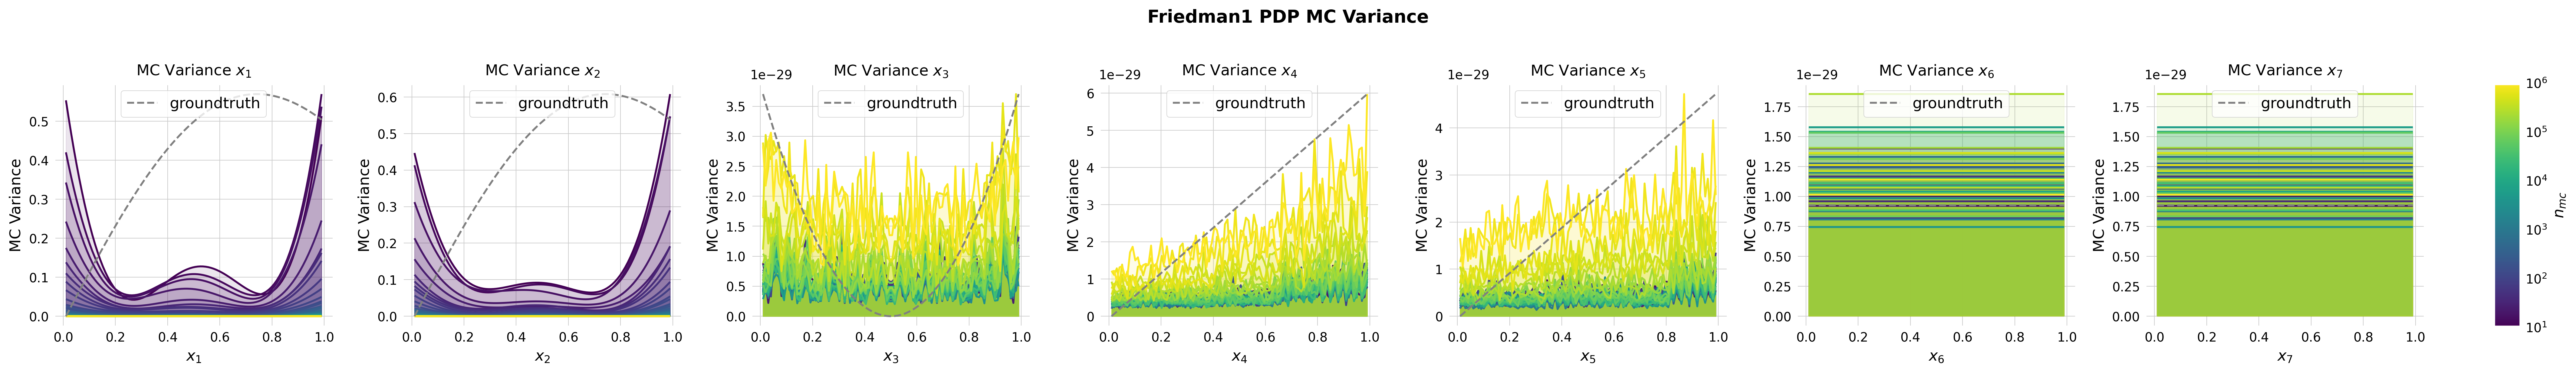

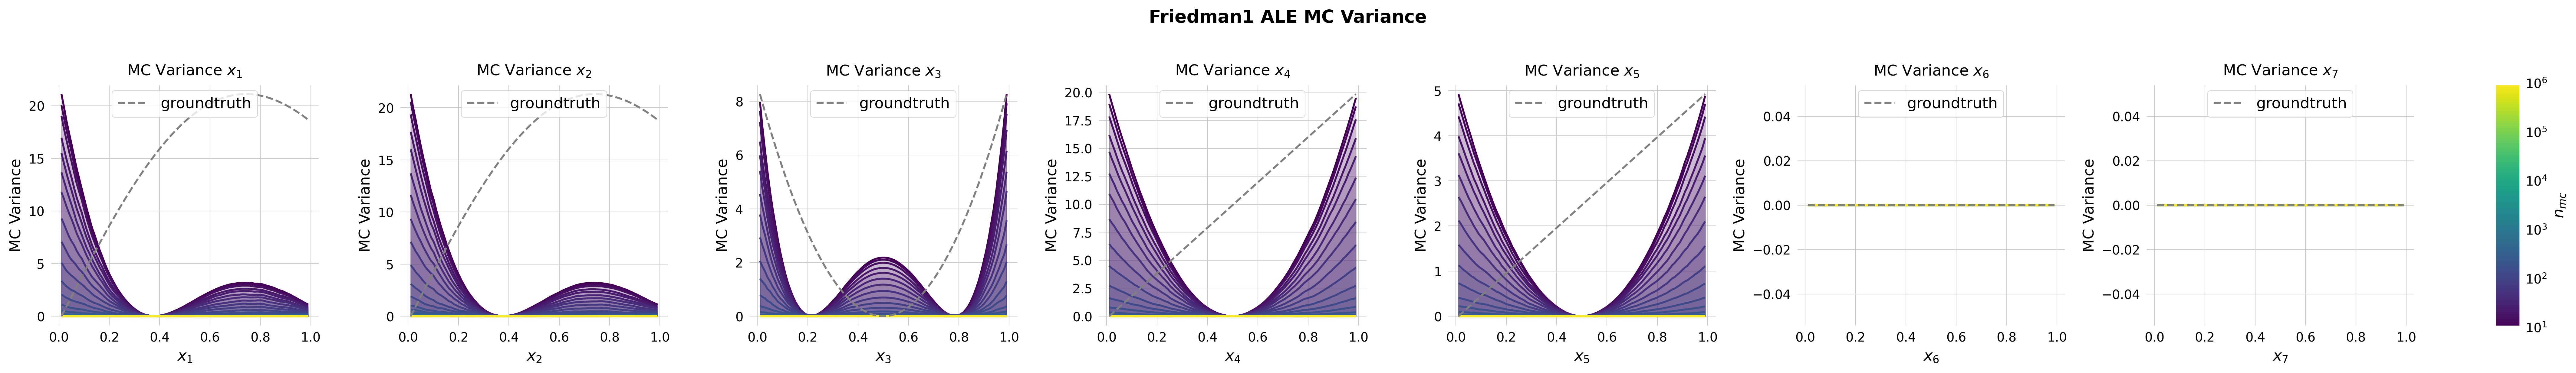

In [10]:
plot_mcvariance_over_features(
    results_friedman1["pdp"],
    friedman1_groundtruth.feature_names,
    title=f"Friedman1 PDP MC Variance",
    groundtruth=friedman1_groundtruth,
    # large_font=True,
    # save_figs=Path("../paper/img/Friedman1-all/"),
)
plot_mcvariance_over_features(
    results_friedman1["ale"],
    friedman1_groundtruth.feature_names,
    title=f"Friedman1 ALE MC Variance",
    groundtruth=friedman1_groundtruth,
    # large_font=True,
    # save_figs=Path("../paper/img/Friedman1-all/"),
)
plt.show()